#1. Importing Required Packages

In [100]:
import numpy as np, pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.metrics import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

#2. Reading and Exploring the Data

In [3]:
from google.colab import files
file=files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [4]:
df=pd.read_csv('Mall_Customers.csv')
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.drop(columns='CustomerID',inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


#3. EDA

##1. Handling with Null and Duplicates

In [9]:
df.isnull().sum()

,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [10]:
df.duplicated().sum()

np.int64(0)

##2. Encoding

In [11]:
le=LabelEncoder()

In [12]:
df['Gender']=le.fit_transform(df['Gender'])
labelmap=dict(zip(le.classes_,le.transform(le.classes_)))
labelmap

{'Female': np.int64(0), 'Male': np.int64(1)}

In [14]:
df.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6


In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,200.0,0.44,0.497633,0.0,0.00,0.0,1.0,1.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


##3. Outlier Detection

In [23]:
for i in df.columns:
  fig=px.box(df[i],title=f'Outlier Detection for Column {i}')
  fig.update_layout(width=500,height=500)
  fig.show()

From the above chart we can conclude that there are outliers present only in the Annual Income Column

We can deal with outliers through the following methods:


*   Remove Outliers using IQR
*   Tranform the data
    1.   Log Tranformation
    2.   Square Root Tranformation
    3.   Box Cox Transformation




<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

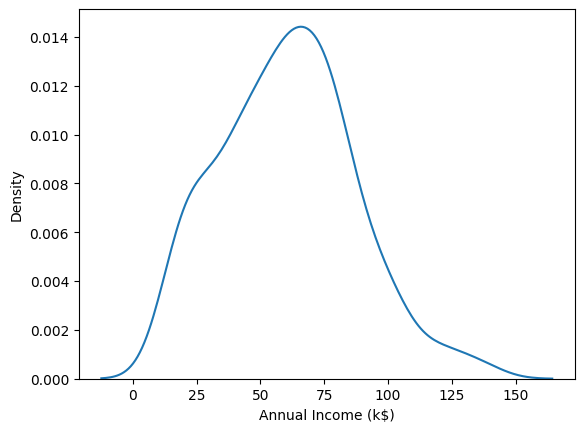

In [25]:
sns.kdeplot(df['Annual Income (k$)'])

In [26]:
# To Make the skewed data normal, we will use square root transformation
df['Annual Income (k$) sqrt']=np.sqrt(df['Annual Income (k$)'])

In [27]:
fig=px.box(df['Annual Income (k$) sqrt'])
fig.update_layout(width=500,height=500)
fig.show()

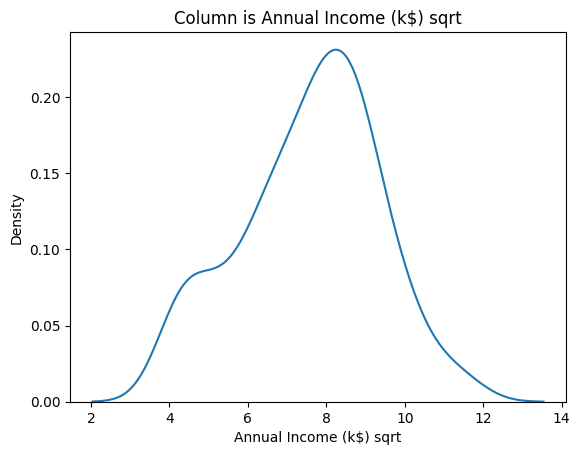

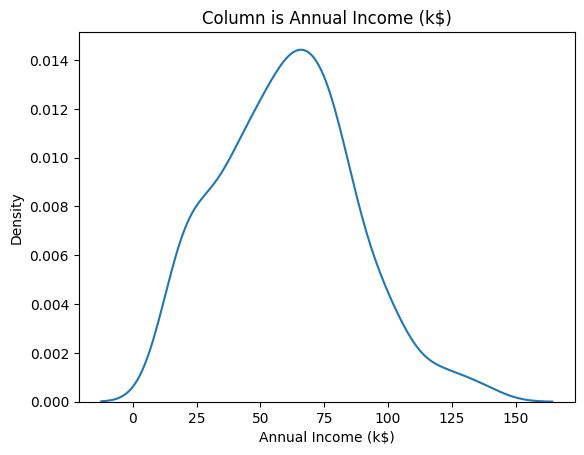

In [29]:
for i in ['Annual Income (k$) sqrt','Annual Income (k$)']:
  sns.kdeplot(df[i])
  plt.title(f"Column is {i}")
  plt.show()

If the Column is highly skewed we can use log transformation

#4. Hierarichal CLuetring Process

In [39]:
x=df.drop(columns=['Annual Income (k$) sqrt']).values

## Make the dendogram to identify number of clusters

Methods for linkage - Single, Complete, Ward

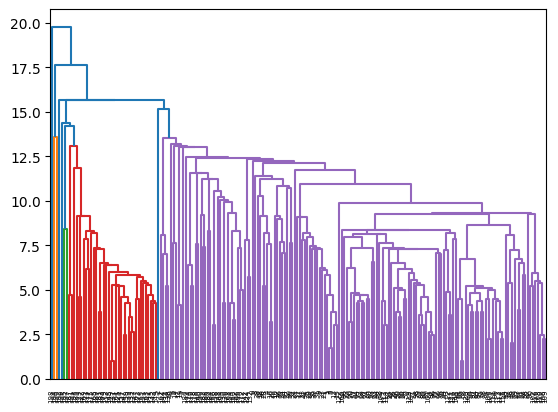

In [45]:
dendogram=sch.dendrogram(sch.linkage(x,method='single'))

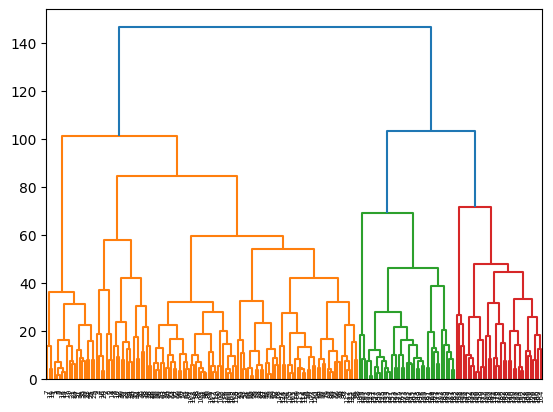

In [46]:
dendogram=sch.dendrogram(sch.linkage(x,method='complete'))

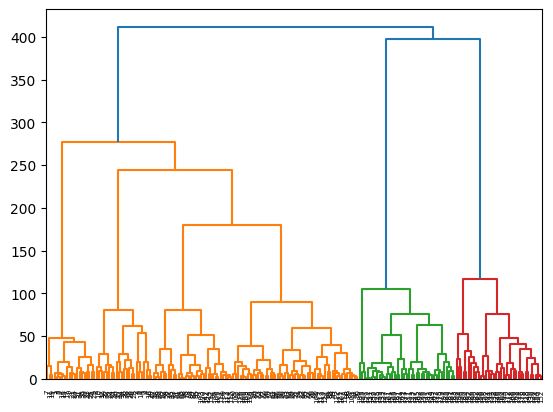

In [47]:
dendogram=sch.dendrogram(sch.linkage(x,method='ward'))

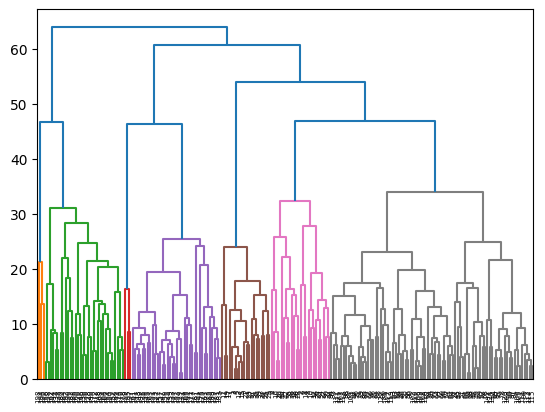

In [48]:
dendogram=sch.dendrogram(sch.linkage(x,method='average'))

Among the above linkages we have complete and ward linkages as the less clumsier ones, clusters created far away are better so we will go with the *Ward Linkage*

In order to find the number of clusters from the Ward Linkage,
We will plot lines across the x axis at every junction, plot another line between the two consecutive junctions with the highest distance between them, and check for the number of intersections , that will be our number of clusters

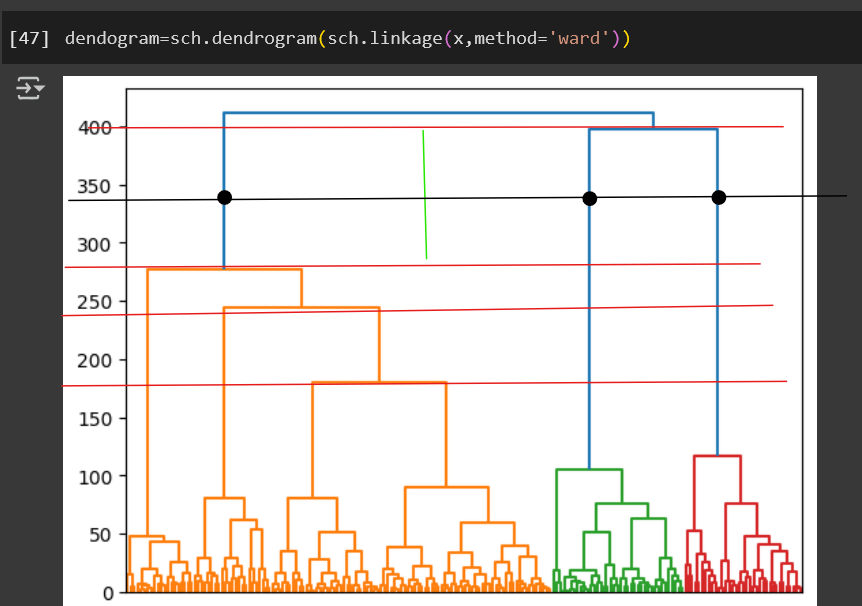

As per out ward Linkage we can find out n_clusters=3

##Apply the Aglomerrative clustering

In [50]:
agg_cluster=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
y=agg_cluster.fit_predict(x)

In [52]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [62]:
df['Cluster Number']=y
df.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Annual Income (k$) sqrt,Cluster Number
0,1,19,15,39,3.872983,0
1,1,21,15,81,3.872983,0
2,0,20,16,6,4.000000,0


#5. Splitting the Data and performing Machine Learning using Classification based models

In [66]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Annual Income (k$) sqrt', 'Cluster Number'],
      dtype='object')

In [67]:
x=df.drop(columns=['Annual Income (k$)','Cluster Number'])
x

,Gender,Age,Spending Score (1-100),Annual Income (k$) sqrt
0,1,19,39,3.872983
1,1,21,81,3.872983
2,0,20,6,4.000000
3,0,23,77,4.000000
4,0,31,40,4.123106
...,...,...,...,...
195,0,35,79,10.954451
196,0,45,28,11.224972
197,1,32,74,11.224972
198,1,32,18,11.704700


In [68]:
y=df['Cluster Number']

In [70]:
xTrain,xTest,yTrain,yTest=train_test_split(x,y,train_size=0.8,random_state=0)

In [74]:
print(xTrain.shape,xTest.shape)

(160, 4) (40, 4)


We will not be using Random forest as looking at shape and size of the data, We will also not be using Naives Baiyes as it is used for mostly sentimental analysis, it is a small data set, we will apply classification algorithms which include the following:

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

##1. Logistic Regression
We have got 100 % Testing accuracy with a 99 % training accuracy

In [142]:
log=LogisticRegression()

In [143]:
log.fit(xTrain,yTrain)

LogisticRegression()

In [144]:
LogPred=log.predict(xTest)
LogPred

array([0, 1, 0, 0, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 2, 2,
       0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0])

In [145]:
LogPredTrain=log.predict(xTrain)

In [147]:
accuracy_score(yTrain,LogPredTrain)

0.99375

In [148]:
accuracy_score(yTest,LogPred)

1.0

##2. Decision Tree

After completion we can say , with gini criterion
max depth =3, we get 95 % testing accuracy , with max depth =4 , we got the same testing and highest training accuracy ( not equal to zero) ,but since we need lesser branches with the former, we will move forward with max depth =3

We will perform this with Hyper Parameter Tuning

In [135]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [136]:
dt.fit(xTrain,yTrain)

DecisionTreeClassifier(max_depth=3)

In [137]:
dtPred=dt.predict(xTest)

In [138]:
dtPredTrain=dt.predict(xTrain)

In [139]:
dt.get_depth()

3

In [140]:
accuracy_score(yTrain,dtPredTrain) # Training accuracy not 100%

0.99375

In [141]:
accuracy_score(yTest,dtPred)

0.95

##3. KNN
for Knn with n_neighbours=3, we get highest testing accuracy which is 88%

In [199]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(xTrain,yTrain)

KNeighborsClassifier(n_neighbors=4)

In [200]:
knnPredTrain=knn.predict(xTrain)

In [201]:
knnPred=knn.predict(xTest)

In [202]:
accuracy_score(yTrain,knnPredTrain)

0.925

In [203]:
accuracy_score(yTest,knnPred)

0.825

Training vs Testing for KNN
k equals
        *   2 - 97% , 85%
        *   3 - 93%  , 88%
        *   4 - 93%  , 83%



#CONCLUSION

By Performing Hierarichal Clustering with Algormerative approach and applying different classification based models, the model that is the best fit for this dataset for future predictions with a high testing accuracy along with a high training accuracy that is not 100 % is **Logistic Regression** with a 100% testing Accuracy
THANK YOU